<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2022-projects/blob/main/my_ADA_boost_MGiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise: My ADAboost algorithm 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

My custom function to test the algorithm (based on the one from the third lecture):

In [ ]:
def my_testing_function(clf = DecisionTreeClassifier(max_depth=5), iterations = 10):
  # Construct dataset
  X1, y1 = make_gaussian_quantiles(cov=2.,
                                  n_samples=8000, n_features=2,
                                  n_classes=2, random_state=1)
  X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                  n_samples=12000, n_features=2,
                                  n_classes=2, random_state=1)
  X = np.concatenate((X1, X2))
  y = np.concatenate((y1, - y2 + 1))


  # Split data into train and test subsets
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.5, shuffle=True)

  # Create and fit a classifier
  
  #clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=6000)
  #clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=600)
  #clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), max_samples=100, n_estimators=100)

  #clf = GaussianNB()
  #clf = AdaBoostClassifier(learning_rate=2.5,base_estimator=GaussianNB(),n_estimators=500,algorithm='SAMME.R') #,algorithm='SAMME.R')
  #clf = BaggingClassifier(GaussianNB(),max_samples=0.009,n_estimators=500)

  #clf = KNeighborsClassifier(n_neighbors=3)
  #clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=3),n_estimators=500)


  #clf = LinearDiscriminantAnalysis()
  #clf = BaggingClassifier(LinearDiscriminantAnalysis(),max_samples=8,n_estimators=100)

  # More variations of ensamble learning
  #clf = GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
  #clf = RandomForestClassifier(n_estimators=200)

  if clf == "my_AdaBoost()":
    my_AdaBoost.fit = fit
    my_AdaBoost.predict = predict
    clf = my_AdaBoost().fit(X_train, y_train, iters=iterations)  
    train_err = (clf.predict(X_train) != y_train).mean()
    print(f'Train error: {train_err:.1%}')
  else:  
    clf.fit(X_train, y_train)
    train_err = (clf.predict(X_train) != y_train).mean()
    print(f'Train error: {train_err:.1%}')

  plot_colors = "br"
  plot_step = 0.01
  class_names = "AB"
  
  plt.figure(figsize=(10, 5))
  
  # Plot the decision boundaries
  x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
  y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  if clf == "my_AdaBoost()":
    if list(np.unique(Z)) == [1]:
      fill_colors = ['r']
    else:
      fill_colors = ['b', 'r']
    axis.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)



  #Plot the test points
  print("Plotting the test points")
  for i, n, c in zip(range(2), class_names, plot_colors):
      # plot first 400 test data points
      N = min(400,len(y_test))
      idx = np.where(y_test[0:N] == i)
      plt.scatter(X_test[idx, 0], X_test[idx, 1],
                  c=c, cmap=plt.cm.Paired,
                  label="Class %s" % n)
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.legend(loc='upper right')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Decision Boundary')

Testing for ordinary classifier:

Train error: 13.3%
Plotting the test points


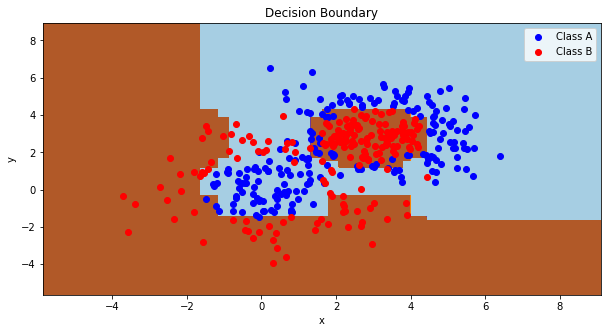

In [ ]:
my_testing_function(clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2),n_estimators=25))

In [ ]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

Helper plotting function

In [ ]:
class my_AdaBoost:
    """ AdaBoost classifier from scratch """

    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None

    def _check_X_y(self, X, y):
        """ Validate assumptions about input data format"""
        assert set(y) == {-1, 1}, 'Response variable must be -1,1'
        return X, y

In [ ]:
def fit(self, X: np.ndarray, y: np.ndarray, iters: int):
    """ Fit the model using training data """
    for i in range(len(y)):
      if y[i] == 0:
        y[i] = -1
    
    X, y = self._check_X_y(X, y)
    n = X.shape[0]
    

    self.sample_weights = np.zeros(shape=(iters, n))
    self.stumps = np.zeros(shape=iters, dtype=object)
    self.stump_weights = np.zeros(shape=iters)
    self.errors = np.zeros(shape=iters)

    
    # initialize weights uniformly
    self.sample_weights[0] = np.ones(shape=n) / n
    for t in range(iters):
        # fit weak learner
        curr_sample_weights = self.sample_weights[t]
        stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        stump = stump.fit(X, y, sample_weight=curr_sample_weights)

        # calculate error and stump weight from weak learner prediction
        stump_pred = stump.predict(X) # this is an array of my predictions, y is an array of true values
        I = stump_pred != y

        err_nominator = curr_sample_weights[I].sum() #/ n
        err_denominator = curr_sample_weights.sum()
        err = err_nominator / err_denominator

        stump_weight = (np.log((1 - err) / err)) / 2



        # update sample weights
        new_sample_weights = curr_sample_weights * np.exp(stump_weight * I)

        # If not final iteration, update sample weights for t+1
        if t+1 < iters:
            self.sample_weights[t+1] = new_sample_weights

        # save results of iteration
        self.stumps[t] = stump
        self.stump_weights[t] = stump_weight
        self.errors[t] = err

    return self

In [ ]:
def predict(self, X):
    """ Make predictions using already fitted model """
    stump_preds = np.array([stump.predict(X) for stump in self.stumps])
    return np.sign(np.dot(self.stump_weights, stump_preds))

My AdaBoost():

Train error: 11.9%
Plotting the test points


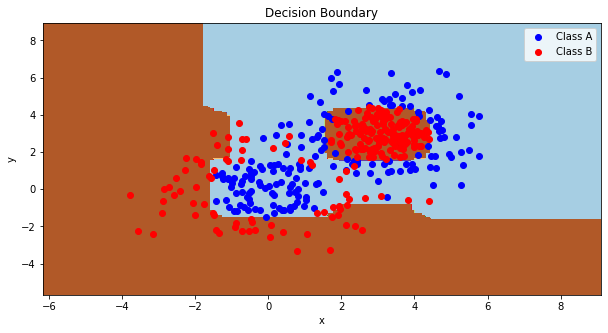

In [ ]:
my_testing_function(clf="my_AdaBoost()", iterations = 200)

Similar results for 25 estimators in AdaBoostClassifier from scikit and 200 iterations in my function.